In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data

In [2]:
car = pd.read_csv('/content/drive/My Drive/Colab Notebooks/project FDS/Car Sale Advertisements/car_ad.csv', encoding='latin-1');
car

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


# Preparation

In [3]:
car.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [4]:
# Column ไหนที่มีค่า null อยู่จะมีค่าที่แสดงว่า True
for i in (car):
  print(car[i].isnull().value_counts(), '\n')

False    9576
Name: car, dtype: int64 

False    9576
Name: price, dtype: int64 

False    9576
Name: body, dtype: int64 

False    9576
Name: mileage, dtype: int64 

False    9142
True      434
Name: engV, dtype: int64 

False    9576
Name: engType, dtype: int64 

False    9576
Name: registration, dtype: int64 

False    9576
Name: year, dtype: int64 

False    9576
Name: model, dtype: int64 

False    9065
True      511
Name: drive, dtype: int64 



### แก้ไขค่า null ของ column drive

จะดูที่คอลัมน์ model เช่น model “E-Class” ส่วนใหญ่จะมีค่าในคอลัมน์ drive เป็น “rear” จะทำการแทนด้วยค่า mode
เพราะว่าเป็นค่าที่พบมากที่สุด ซึ่งแปลว่าค่าที่หายไปมีโอกาสที่จะเป็นค่า mode มากที่สุด 

หลักการเดียวกันกับ Bayes' theorem โดยส่วนที่มีค่าเปรียบเสมือนค่าที่ไว้สร้างโมเดลและค่าว่างเหมือนข้อมูลใหม่ที่เข้ามาและต้องการทำนายค่า

In [5]:
x = car[car.model == 'CL 550']
print(x['drive'].mode(), '\n')
print(car['drive'].value_counts(), '\n')
print(car['drive'].mode())

0    rear
dtype: object 

front    5188
full     2500
rear     1377
Name: drive, dtype: int64 

0    front
dtype: object


In [6]:
n = 0
for i in car['drive'].isnull():
  if i == True:
    check = car['model'].loc[n]
    new = np.where(car['model'] == check)
    new = car.loc[new[0]]
    new_drive = new['drive'].mode()

    if type(new_drive.any()) == str:
      car.loc[car.model == check, 'drive'] = car.loc[car.model == check, 'drive'].fillna(new_drive.loc[0])
    elif type(new_drive.any()) == bool:
      car.loc[car.model == check, 'drive'] = car.loc[car.model == check, 'drive'].fillna(car['drive'].mode().loc[0])
  n += 1
car

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [7]:
for i in (car):
  print(car[i].isnull().value_counts(), '\n')

# ค่า null ที่ column drive ลดลงหลังจากทำขั้นตอนข้างบน

False    9576
Name: car, dtype: int64 

False    9576
Name: price, dtype: int64 

False    9576
Name: body, dtype: int64 

False    9576
Name: mileage, dtype: int64 

False    9142
True      434
Name: engV, dtype: int64 

False    9576
Name: engType, dtype: int64 

False    9576
Name: registration, dtype: int64 

False    9576
Name: year, dtype: int64 

False    9576
Name: model, dtype: int64 

False    9576
Name: drive, dtype: int64 



### แก้ไข้ค่า null ของ column engV

In [8]:
# แทนด้วยค่า median เพื่อหลีกเลี่ยงค่า outlier
engV_median = car['engV'].median()
car = car.fillna(value={'engV' : engV_median})
car

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


In [9]:
for i in (car):
  print(car[i].isnull().value_counts(), '\n')

# ค่า null ที่ column engV ลดลงหลังจากทำขั้นตอนข้างบน

False    9576
Name: car, dtype: int64 

False    9576
Name: price, dtype: int64 

False    9576
Name: body, dtype: int64 

False    9576
Name: mileage, dtype: int64 

False    9576
Name: engV, dtype: int64 

False    9576
Name: engType, dtype: int64 

False    9576
Name: registration, dtype: int64 

False    9576
Name: year, dtype: int64 

False    9576
Name: model, dtype: int64 

False    9576
Name: drive, dtype: int64 



### แก้ไข้ค่า null ของ column engType (Other)

In [0]:
# print(len(car), '\n')
# print(len(car[car.engType == 'Other']), '\n')
# print(len(car[car.engType != 'Other']))

In [11]:
# ลบข้อมูล Other ออก
car = car[car.engType != 'Other']
car

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


### ทำการกำจัดค่า outlier และค่าผิดปกติของ price 

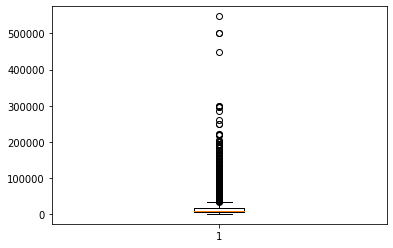

In [12]:
plt.boxplot(car['price']);

In [13]:
#กำจัด price = 0
car = car[car.price != 0];

#กำจัดค่า outlier
q1 = np.quantile(car['price'], 0.25) #quantile 1 ของ price
q3 = np.quantile(car['price'], 0.75) #quantile 3 ของ price
iqr = q3 - q1 #IQR ของ price
lower = q1 - (1.5 * iqr) #lower 1.5*IQR whisker
higher = q3 + (1.5 * iqr) #higher 1.5*IQR whisker
# print(lower, '-', higher)
car = car[car.price >= lower]#ลบข้อมูลที่มีค่าน้อยกว่า lower
car = car[car.price <= higher]#ลบข้อมูลที่มีค่ามากกว่า higher
print(max(car['price']))
print(min(car['price']))
car

34000.0
280.0


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front


# Visualization

### Bar chart

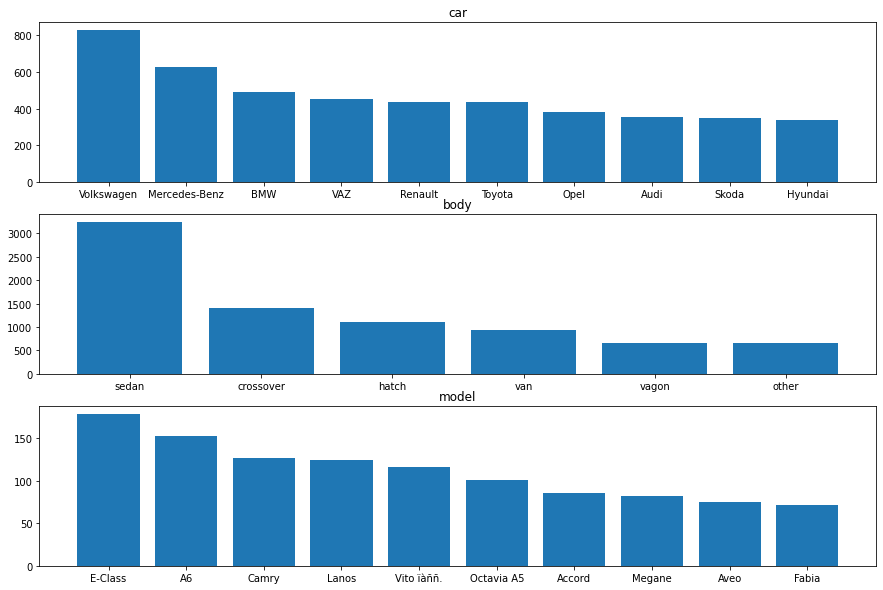

In [14]:
#bar plot
bar_plot = ['car', 'body', 'model']
fig = plt.rcParams["figure.figsize"] = (15,10)

n = 1
for i in bar_plot:
  plt.subplot(len(bar_plot),1,n)
  x = car[i].value_counts().head(10).keys();
  y = car[i].value_counts().head(10)
  plt.bar(x, y)
  # print(x, '\n', y, '\n')
  plt.title(i)
  n += 1

### Pie chart

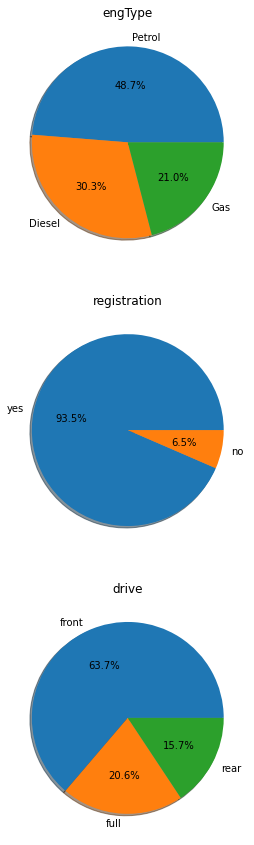

In [15]:
#pie_plot
pie_plot = ['engType', 'registration', 'drive']
fig = plt.rcParams["figure.figsize"] = (15,15)

n = 1
for i in pie_plot:
  plt.subplot(len(pie_plot),1,n)
  # print(car[i].value_counts())
  plt.pie(car[i].value_counts(), labels = car[i].value_counts().keys(), autopct='%1.1f%%', shadow=True)
  plt.title(i)
  n += 1

### Line chart

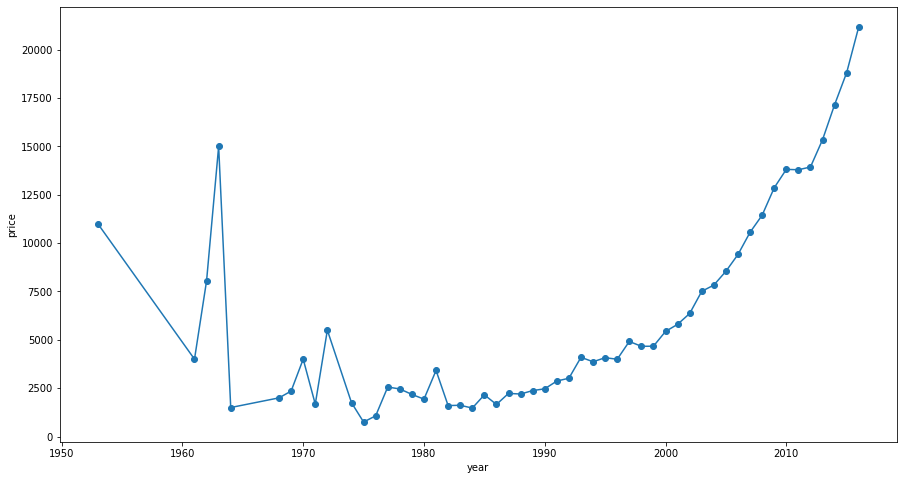

In [16]:
fig = plt.rcParams["figure.figsize"] = (15,8)
x = np.sort(car['year'].drop_duplicates()) # เอาปีที่ซ้ำกันออกและเรียงลำดับจากน้อยไปมาก
y = car[['year', 'price']].groupby(['year']).mean() # ทำการ group by ด้วย year และหาค่า mean ของ price ในแต่ละปี
plt.plot(x, y, marker='o') # ทำการมาร์ครูป o ในแต่ละปี
plt.xlabel('year') 
plt.ylabel('price');
# จะเห็นได้ว่าราคาเฉลี่ยมีแนวโน้มสูงขึ้นเรื่อย ๆ ตั้งแต่ประมาณปี 2000
# print(x, y)

# Linear Regression

### ทำการพล็อต Scatter plot เพื่อดูความสัมพันธ์ของตัวแปร mileage และ price

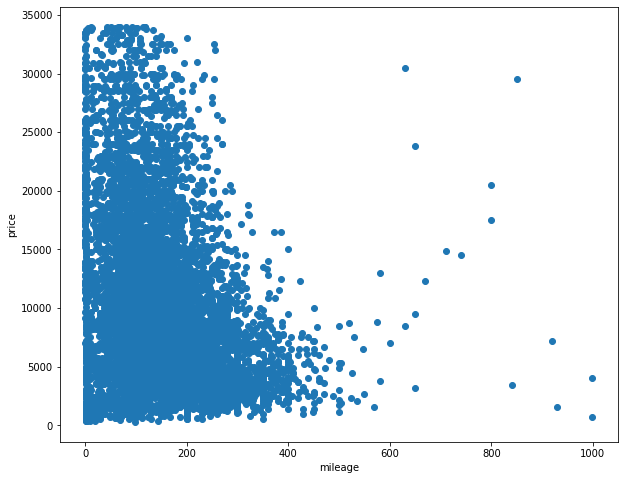

In [17]:
fig = plt.rcParams["figure.figsize"] = (10,8)
plt.scatter(car['mileage'], car['price'])
plt.ylabel('price')
plt.xlabel('mileage');

สรุปผล mileage และ price ไม่มีความสัมพันธ์กันในลักษณะเชิงเส้น จึงไม่สามารถทำ Linear Regression ได้